In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


In [2]:
pwd

'/Users/carlosgarciabodini/Desktop/Kaggle /Titanic Project'

In [3]:
train= pd.read_csv('/Users/carlosgarciabodini/Desktop/train.csv')
test= pd.read_csv('/Users/carlosgarciabodini/Desktop/test.csv')
gender_submission= pd.read_csv('/Users/carlosgarciabodini/Desktop/gender_submission.csv')


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
len(train)

891

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
len(test)

418

In [8]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
len(gender_submission)

418

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing values in the Age column

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


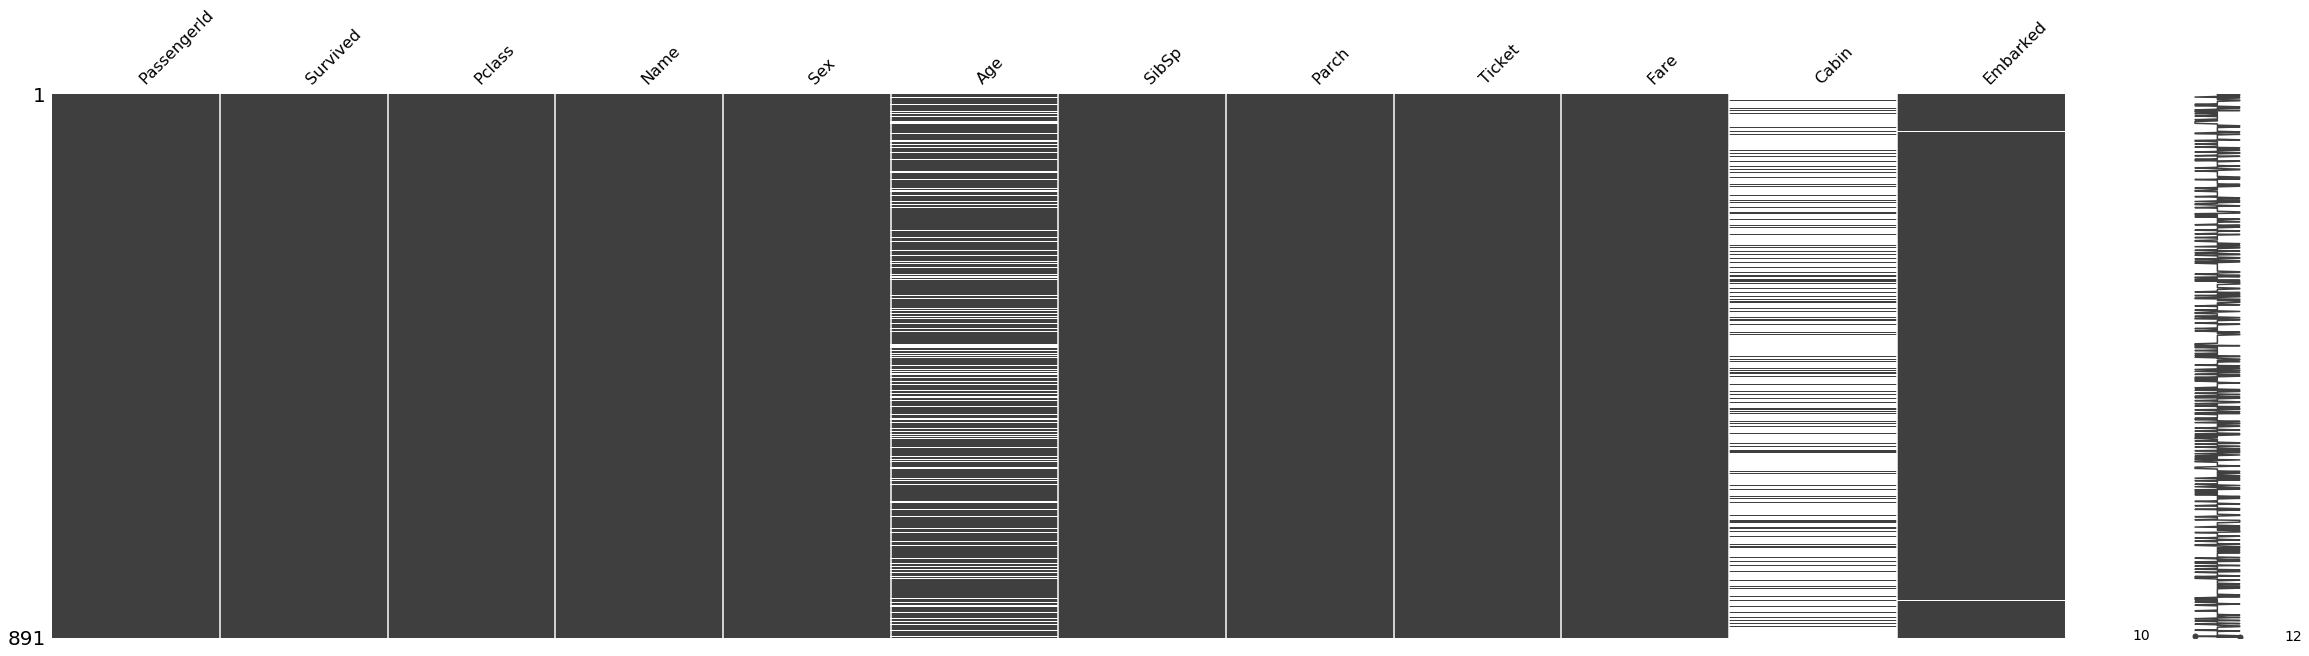

In [12]:
missingno.matrix(train, figsize= (40,10))

missing data in Age and embarked, cabin is to empty wont look at 

In [13]:
def missing_v(df,columns):
    missing_vals={}
    df.len=len(df)
    for column in columns:
        total_column_values=df[column].value_counts().sum()
        missing_vals[column]=df.len-total_column_values
    return missing_vals
missing_values=missing_v(train, columns=train.columns)
missing_values

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

found exact amount of missing values per column

In [14]:
df_bin=pd.DataFrame()
df_con=pd.DataFrame()

separating for continious and discrete continued variables

In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived

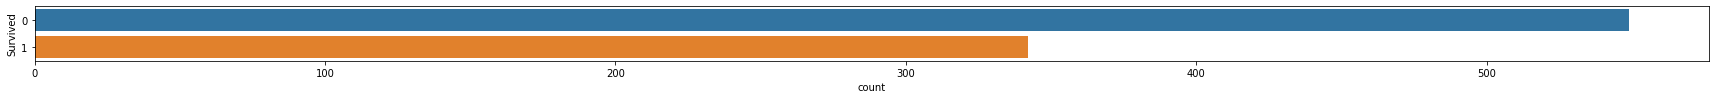

In [17]:
fig=plt.figure(figsize=(30,1))
sns.countplot(y='Survived',data=train)

In [18]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

Ticket Class

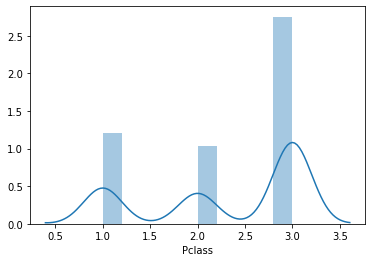

In [20]:
sns.distplot(train.Pclass)

1 means 1st class, 2 means 2nd class and 3 meand 3rd class

In [21]:
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

Sex

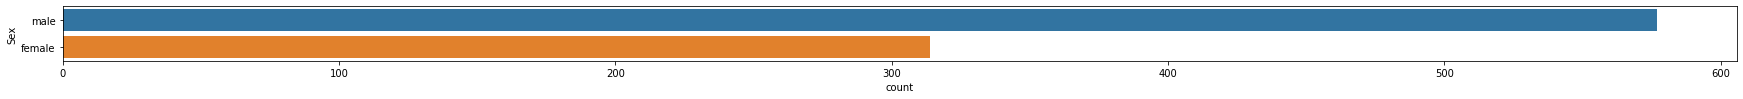

In [22]:
fig=plt.figure(figsize=(30,1))
sns.countplot(y='Sex',data=train)

In [23]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
df_bin['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']== 'female',1,0)
df_con['Sex']=train['Sex']

set male and female variables and 0 or 1

In [25]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


comparison graph between sex and survival

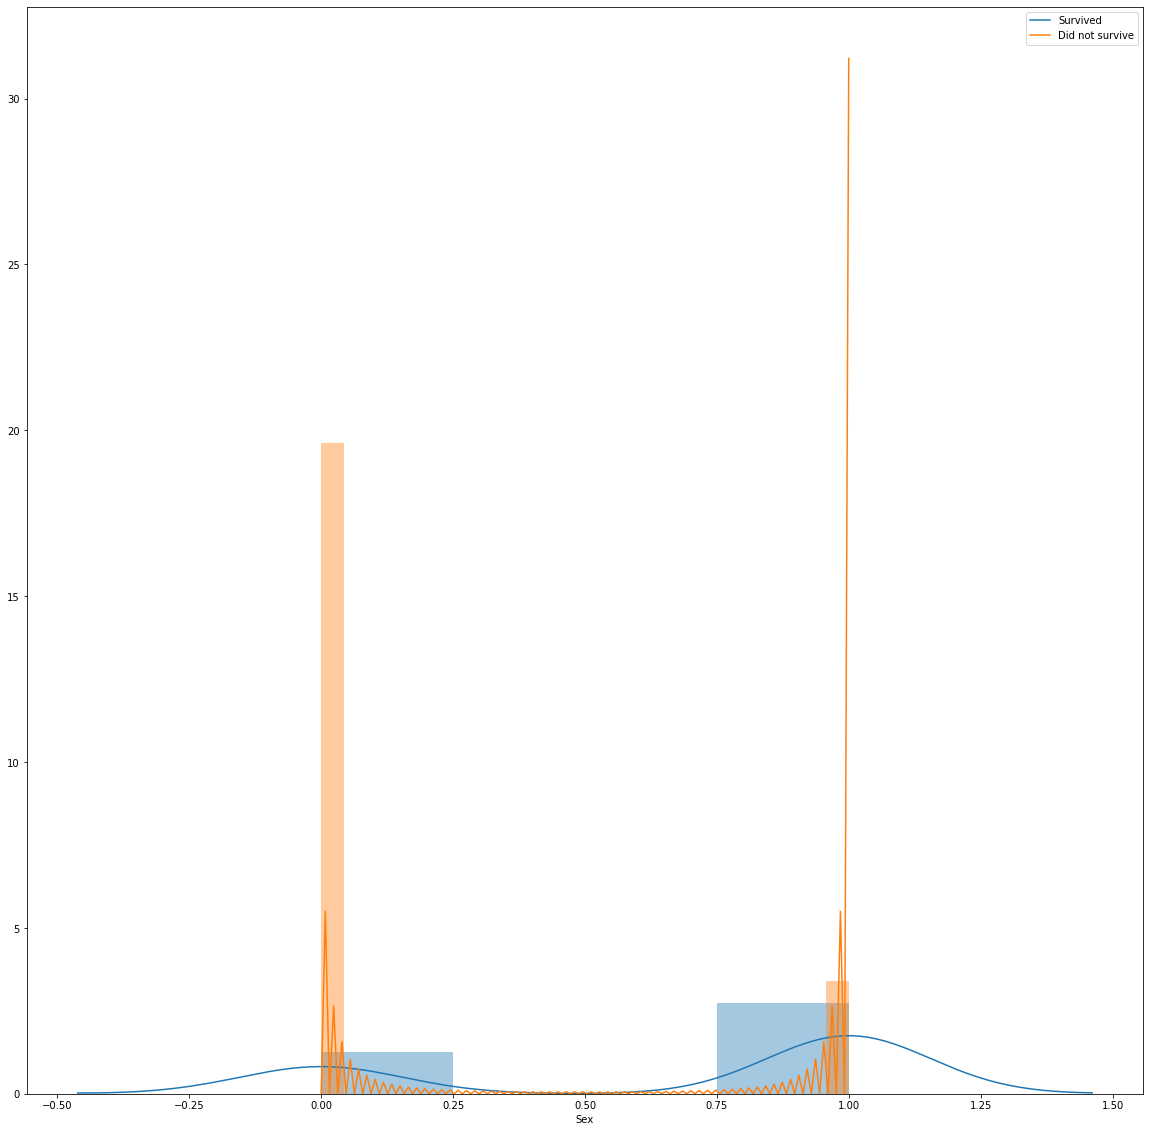

In [26]:
fig = plt.figure(figsize=(20, 20))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

more females survived than males

SibSp

In [27]:
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']

In [28]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

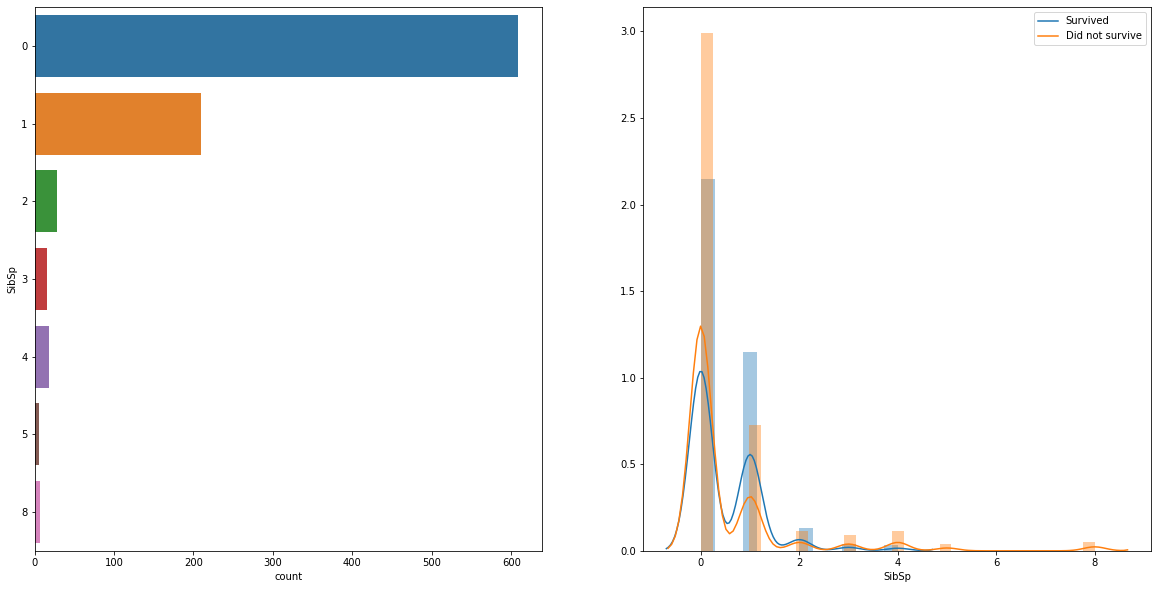

In [29]:
plot_count_dist(train, bin_df=df_bin, label_column='Survived', target_column='SibSp',figsize=(20, 10))

if you had family on board you are more likely to survive

Parch

In [30]:
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

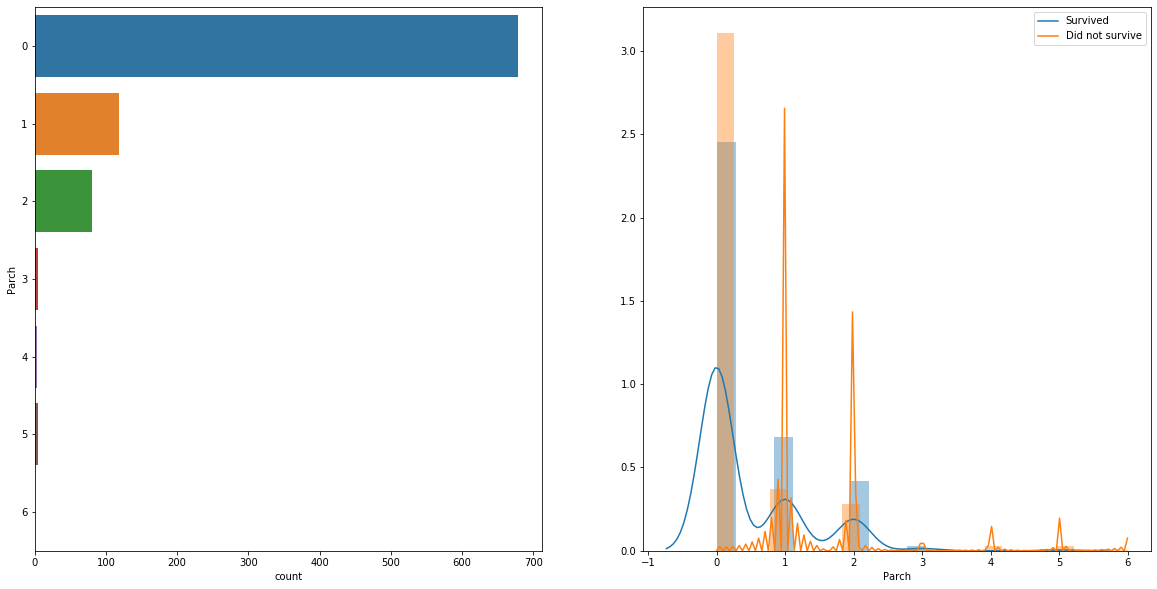

In [31]:
plot_count_dist(train, bin_df=df_bin,label_column='Survived', target_column='Parch', figsize=(20, 10))

In [32]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


Ticket

In [33]:
train.Ticket.isnull().sum()

0

In [34]:
train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
347088      6
3101295     6
           ..
350407      1
2926        1
113055      1
345765      1
113051      1
Name: Ticket, Length: 681, dtype: int64

Fare

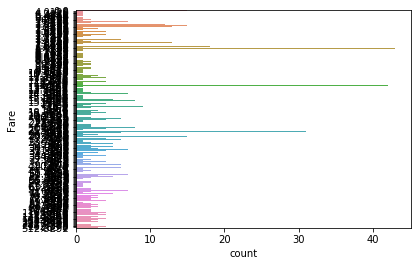

In [35]:
sns.countplot(y='Fare',data=train)

In [36]:
df_bin['Fare']=pd.cut(train['Fare'],bins=5)
df_con['Fare']=train['Fare']

In [37]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


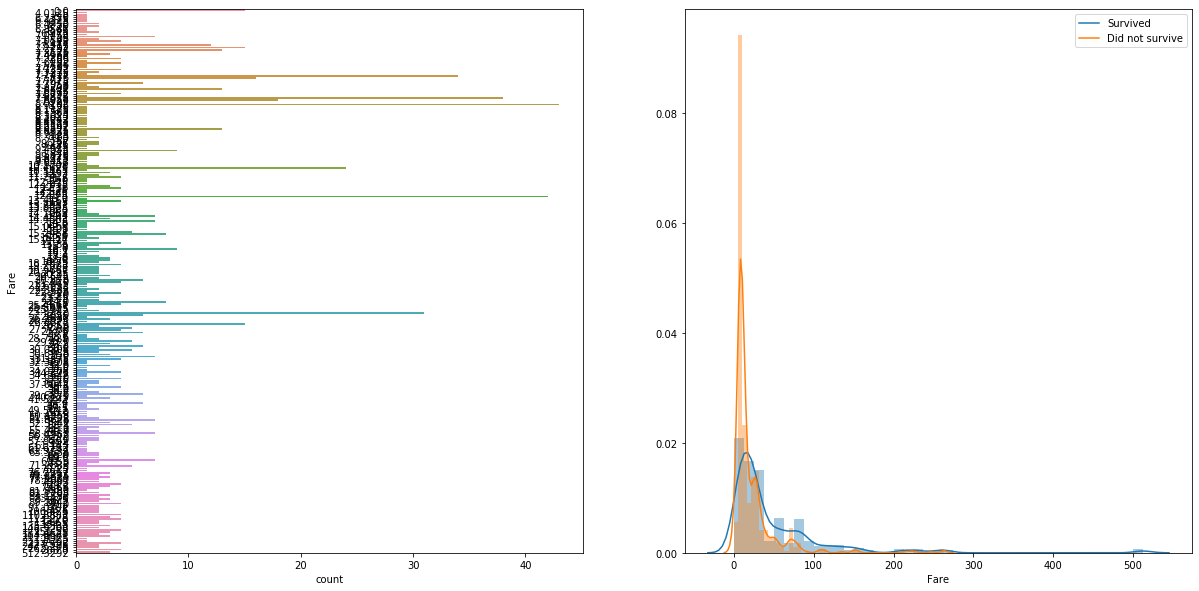

In [38]:
plot_count_dist(train, bin_df=df_bin,label_column='Survived', target_column='Fare', figsize=(20, 10))

Cabin

In [39]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
              ..
D46            1
D49            1
A26            1
B73            1
B102           1
Name: Cabin, Length: 147, dtype: int64

useless rn 

Embarked

In [40]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

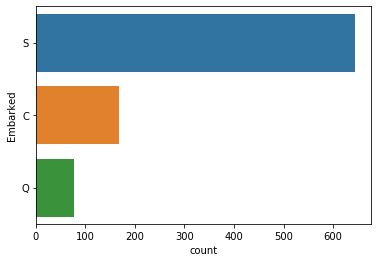

In [41]:
sns.countplot(y='Embarked',data=train)

In [42]:
df_bin['Embarked']=train['Embarked']
df_con['Embarked']=train['Embarked']

In [43]:

df_con=df_con.dropna(subset=['Embarked'])
df_bi =df_bin.dropna(subset=['Embarked'])

In [44]:
df_bin.head()


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [45]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


Feature Enconding

In [46]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [47]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [48]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [49]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


ML Models

In [50]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [51]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [52]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [53]:
X_train.shape

(889, 11)

In [54]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [55]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

Logistic Regression 

In [56]:

start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:03.912442


k-Nearest Neighbours

In [57]:

start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.108580


Gaussian Naive Bayes

In [58]:

start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.043773


Linear SVC

In [59]:

start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 79.19
Accuracy CV 10-Fold: 74.8
Running Time: 0:00:00.243912


Stochastic Gradient Descent

In [60]:

start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 61.75
Accuracy CV 10-Fold: 71.2
Running Time: 0:00:00.061529


Decision Tree Classifier

In [61]:

start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 79.64
Running Time: 0:00:00.059898


Gradient Boosting Trees

In [62]:

start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.351674


catboost

In [63]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [64]:

# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [65]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [66]:

# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 60.8ms	remaining: 1m
1:	learn: 0.6809444	total: 67.6ms	remaining: 33.7s
2:	learn: 0.6751692	total: 72.2ms	remaining: 24s
3:	learn: 0.6689060	total: 76.8ms	remaining: 19.1s
4:	learn: 0.6632144	total: 81.2ms	remaining: 16.2s
5:	learn: 0.6576488	total: 84.5ms	remaining: 14s
6:	learn: 0.6544441	total: 87.5ms	remaining: 12.4s
7:	learn: 0.6490635	total: 91.6ms	remaining: 11.4s
8:	learn: 0.6443241	total: 96ms	remaining: 10.6s
9:	learn: 0.6395935	total: 101ms	remaining: 10s
10:	learn: 0.6345186	total: 105ms	remaining: 9.43s
11:	learn: 0.6305316	total: 109ms	remaining: 8.97s
12:	learn: 0.6275610	total: 111ms	remaining: 8.46s
13:	learn: 0.6225020	total: 116ms	remaining: 8.18s
14:	learn: 0.6179503	total: 120ms	remaining: 7.9s
15:	learn: 0.6140480	total: 123ms	remaining: 7.54s
16:	learn: 0.6100034	total: 126ms	remaining: 7.29s
17:	learn: 0.6049646	total: 131ms	remaining: 7.16s
18:	learn: 0.6025760	total: 134ms	remaining: 6.91s
19:	learn: 0.5

173:	learn: 0.4206421	total: 699ms	remaining: 3.32s
174:	learn: 0.4201114	total: 703ms	remaining: 3.31s
175:	learn: 0.4198212	total: 707ms	remaining: 3.31s
176:	learn: 0.4195834	total: 711ms	remaining: 3.31s
177:	learn: 0.4195685	total: 713ms	remaining: 3.29s
178:	learn: 0.4194809	total: 715ms	remaining: 3.28s
179:	learn: 0.4191368	total: 719ms	remaining: 3.28s
180:	learn: 0.4185960	total: 723ms	remaining: 3.27s
181:	learn: 0.4184559	total: 727ms	remaining: 3.27s
182:	learn: 0.4180542	total: 731ms	remaining: 3.26s
183:	learn: 0.4178579	total: 735ms	remaining: 3.26s
184:	learn: 0.4175684	total: 739ms	remaining: 3.26s
185:	learn: 0.4173356	total: 743ms	remaining: 3.25s
186:	learn: 0.4169641	total: 748ms	remaining: 3.25s
187:	learn: 0.4165340	total: 752ms	remaining: 3.25s
188:	learn: 0.4162489	total: 756ms	remaining: 3.24s
189:	learn: 0.4160227	total: 760ms	remaining: 3.24s
190:	learn: 0.4156773	total: 764ms	remaining: 3.23s
191:	learn: 0.4153906	total: 766ms	remaining: 3.23s
192:	learn: 

336:	learn: 0.3914735	total: 1.28s	remaining: 2.52s
337:	learn: 0.3914486	total: 1.28s	remaining: 2.52s
338:	learn: 0.3912764	total: 1.29s	remaining: 2.52s
339:	learn: 0.3911365	total: 1.29s	remaining: 2.51s
340:	learn: 0.3910828	total: 1.3s	remaining: 2.51s
341:	learn: 0.3910413	total: 1.3s	remaining: 2.5s
342:	learn: 0.3910351	total: 1.3s	remaining: 2.5s
343:	learn: 0.3908388	total: 1.31s	remaining: 2.49s
344:	learn: 0.3907468	total: 1.31s	remaining: 2.49s
345:	learn: 0.3905556	total: 1.31s	remaining: 2.48s
346:	learn: 0.3905329	total: 1.32s	remaining: 2.48s
347:	learn: 0.3904624	total: 1.32s	remaining: 2.48s
348:	learn: 0.3904620	total: 1.32s	remaining: 2.47s
349:	learn: 0.3901004	total: 1.33s	remaining: 2.47s
350:	learn: 0.3900990	total: 1.33s	remaining: 2.46s
351:	learn: 0.3898423	total: 1.33s	remaining: 2.46s
352:	learn: 0.3898011	total: 1.34s	remaining: 2.45s
353:	learn: 0.3897611	total: 1.34s	remaining: 2.45s
354:	learn: 0.3897227	total: 1.35s	remaining: 2.45s
355:	learn: 0.389

503:	learn: 0.3763980	total: 1.86s	remaining: 1.83s
504:	learn: 0.3763692	total: 1.86s	remaining: 1.83s
505:	learn: 0.3763085	total: 1.87s	remaining: 1.82s
506:	learn: 0.3761631	total: 1.87s	remaining: 1.82s
507:	learn: 0.3760934	total: 1.87s	remaining: 1.81s
508:	learn: 0.3760498	total: 1.88s	remaining: 1.81s
509:	learn: 0.3760150	total: 1.88s	remaining: 1.81s
510:	learn: 0.3759970	total: 1.88s	remaining: 1.8s
511:	learn: 0.3759798	total: 1.89s	remaining: 1.8s
512:	learn: 0.3759568	total: 1.89s	remaining: 1.79s
513:	learn: 0.3758344	total: 1.89s	remaining: 1.79s
514:	learn: 0.3757406	total: 1.9s	remaining: 1.79s
515:	learn: 0.3757113	total: 1.9s	remaining: 1.78s
516:	learn: 0.3755908	total: 1.93s	remaining: 1.8s
517:	learn: 0.3755538	total: 1.93s	remaining: 1.8s
518:	learn: 0.3753678	total: 1.93s	remaining: 1.79s
519:	learn: 0.3753303	total: 1.94s	remaining: 1.79s
520:	learn: 0.3752635	total: 1.94s	remaining: 1.78s
521:	learn: 0.3751578	total: 1.95s	remaining: 1.78s
522:	learn: 0.3751

675:	learn: 0.3628277	total: 2.51s	remaining: 1.21s
676:	learn: 0.3628277	total: 2.52s	remaining: 1.2s
677:	learn: 0.3627016	total: 2.52s	remaining: 1.2s
678:	learn: 0.3626910	total: 2.52s	remaining: 1.19s
679:	learn: 0.3624607	total: 2.53s	remaining: 1.19s
680:	learn: 0.3623905	total: 2.53s	remaining: 1.19s
681:	learn: 0.3623699	total: 2.54s	remaining: 1.18s
682:	learn: 0.3622673	total: 2.54s	remaining: 1.18s
683:	learn: 0.3622159	total: 2.54s	remaining: 1.18s
684:	learn: 0.3620935	total: 2.55s	remaining: 1.17s
685:	learn: 0.3620513	total: 2.55s	remaining: 1.17s
686:	learn: 0.3620486	total: 2.56s	remaining: 1.16s
687:	learn: 0.3619951	total: 2.56s	remaining: 1.16s
688:	learn: 0.3619865	total: 2.56s	remaining: 1.16s
689:	learn: 0.3618570	total: 2.57s	remaining: 1.15s
690:	learn: 0.3617204	total: 2.57s	remaining: 1.15s
691:	learn: 0.3617203	total: 2.58s	remaining: 1.15s
692:	learn: 0.3617203	total: 2.58s	remaining: 1.14s
693:	learn: 0.3616484	total: 2.58s	remaining: 1.14s
694:	learn: 0.

837:	learn: 0.3519963	total: 3.15s	remaining: 608ms
838:	learn: 0.3519587	total: 3.15s	remaining: 604ms
839:	learn: 0.3518946	total: 3.15s	remaining: 601ms
840:	learn: 0.3518871	total: 3.16s	remaining: 597ms
841:	learn: 0.3518257	total: 3.16s	remaining: 594ms
842:	learn: 0.3518257	total: 3.17s	remaining: 590ms
843:	learn: 0.3516969	total: 3.17s	remaining: 586ms
844:	learn: 0.3516134	total: 3.17s	remaining: 582ms
845:	learn: 0.3515626	total: 3.18s	remaining: 579ms
846:	learn: 0.3513883	total: 3.18s	remaining: 575ms
847:	learn: 0.3512275	total: 3.19s	remaining: 572ms
848:	learn: 0.3512070	total: 3.19s	remaining: 568ms
849:	learn: 0.3511331	total: 3.2s	remaining: 564ms
850:	learn: 0.3511326	total: 3.2s	remaining: 560ms
851:	learn: 0.3510670	total: 3.2s	remaining: 557ms
852:	learn: 0.3510078	total: 3.21s	remaining: 553ms
853:	learn: 0.3509421	total: 3.21s	remaining: 549ms
854:	learn: 0.3508649	total: 3.21s	remaining: 545ms
855:	learn: 0.3507884	total: 3.22s	remaining: 542ms
856:	learn: 0.3

In [70]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)
11:	learn: 0.5447302	test: 0.5517930	best: 0.5517930 (11)
12:	learn: 0.5377424	test: 0.5449873	best: 0.5449873 (12)
13:	learn: 0.5305336	test: 0.5382423	best: 0.5382423 (13)
14:	learn: 0.5241296	test: 0.5323280	best: 0.5323280 (14)
15:	learn: 0.5171284	test: 0.5265741	best: 0.5265741 (15)
16:	learn: 0.5113308	test: 0.5214578	best: 0.5214578 (16)
17:	learn: 0.5063945	test: 0.51688

169:	learn: 0.3708151	test: 0.4382247	best: 0.4375885 (133)
170:	learn: 0.3705341	test: 0.4382206	best: 0.4375885 (133)
171:	learn: 0.3702579	test: 0.4381828	best: 0.4375885 (133)
172:	learn: 0.3700014	test: 0.4380525	best: 0.4375885 (133)
173:	learn: 0.3697051	test: 0.4380720	best: 0.4375885 (133)
174:	learn: 0.3694642	test: 0.4380150	best: 0.4375885 (133)
175:	learn: 0.3691009	test: 0.4380279	best: 0.4375885 (133)
176:	learn: 0.3688905	test: 0.4381575	best: 0.4375885 (133)
177:	learn: 0.3686335	test: 0.4382308	best: 0.4375885 (133)
178:	learn: 0.3684197	test: 0.4383125	best: 0.4375885 (133)
179:	learn: 0.3681903	test: 0.4383017	best: 0.4375885 (133)
180:	learn: 0.3679923	test: 0.4383894	best: 0.4375885 (133)
181:	learn: 0.3678126	test: 0.4384124	best: 0.4375885 (133)
182:	learn: 0.3675369	test: 0.4382845	best: 0.4375885 (133)
183:	learn: 0.3672577	test: 0.4384239	best: 0.4375885 (133)
184:	learn: 0.3670808	test: 0.4384315	best: 0.4375885 (133)
185:	learn: 0.3668779	test: 0.4382930	be

381:	learn: 0.3178498	test: 0.4355437	best: 0.4354707 (380)
382:	learn: 0.3175611	test: 0.4354001	best: 0.4354001 (382)
383:	learn: 0.3172598	test: 0.4353746	best: 0.4353746 (383)
384:	learn: 0.3169572	test: 0.4353126	best: 0.4353126 (384)
385:	learn: 0.3167215	test: 0.4352901	best: 0.4352901 (385)
386:	learn: 0.3164149	test: 0.4351131	best: 0.4351131 (386)
387:	learn: 0.3161261	test: 0.4349882	best: 0.4349882 (387)
388:	learn: 0.3159371	test: 0.4350494	best: 0.4349882 (387)
389:	learn: 0.3157148	test: 0.4349581	best: 0.4349581 (389)
390:	learn: 0.3154436	test: 0.4350426	best: 0.4349581 (389)
391:	learn: 0.3152268	test: 0.4350898	best: 0.4349581 (389)
392:	learn: 0.3149894	test: 0.4349402	best: 0.4349402 (392)
393:	learn: 0.3147009	test: 0.4350295	best: 0.4349402 (392)
394:	learn: 0.3145509	test: 0.4349972	best: 0.4349402 (392)
395:	learn: 0.3142341	test: 0.4348099	best: 0.4348099 (395)
396:	learn: 0.3140547	test: 0.4347227	best: 0.4347227 (396)
397:	learn: 0.3138824	test: 0.4346651	be

523:	learn: 0.2882237	test: 0.4326460	best: 0.4320750 (502)
524:	learn: 0.2880393	test: 0.4325946	best: 0.4320750 (502)
525:	learn: 0.2878791	test: 0.4326951	best: 0.4320750 (502)
526:	learn: 0.2876788	test: 0.4327238	best: 0.4320750 (502)
527:	learn: 0.2875348	test: 0.4327696	best: 0.4320750 (502)
528:	learn: 0.2872599	test: 0.4327186	best: 0.4320750 (502)
529:	learn: 0.2870168	test: 0.4328814	best: 0.4320750 (502)
530:	learn: 0.2868869	test: 0.4328016	best: 0.4320750 (502)
531:	learn: 0.2865942	test: 0.4326157	best: 0.4320750 (502)
532:	learn: 0.2864453	test: 0.4325459	best: 0.4320750 (502)
533:	learn: 0.2862115	test: 0.4324408	best: 0.4320750 (502)
534:	learn: 0.2860609	test: 0.4324721	best: 0.4320750 (502)
535:	learn: 0.2859668	test: 0.4324253	best: 0.4320750 (502)
536:	learn: 0.2857922	test: 0.4324755	best: 0.4320750 (502)
537:	learn: 0.2855471	test: 0.4325801	best: 0.4320750 (502)
538:	learn: 0.2853909	test: 0.4326568	best: 0.4320750 (502)
539:	learn: 0.2852147	test: 0.4326997	be

739:	learn: 0.2547782	test: 0.4339016	best: 0.4320750 (502)
740:	learn: 0.2546638	test: 0.4337830	best: 0.4320750 (502)
741:	learn: 0.2545433	test: 0.4337980	best: 0.4320750 (502)
742:	learn: 0.2543867	test: 0.4337752	best: 0.4320750 (502)
743:	learn: 0.2542180	test: 0.4337101	best: 0.4320750 (502)
744:	learn: 0.2541058	test: 0.4337838	best: 0.4320750 (502)
745:	learn: 0.2539621	test: 0.4337084	best: 0.4320750 (502)
746:	learn: 0.2538089	test: 0.4337140	best: 0.4320750 (502)
747:	learn: 0.2536510	test: 0.4338620	best: 0.4320750 (502)
748:	learn: 0.2535186	test: 0.4339017	best: 0.4320750 (502)
749:	learn: 0.2533205	test: 0.4338327	best: 0.4320750 (502)
750:	learn: 0.2531586	test: 0.4338383	best: 0.4320750 (502)
751:	learn: 0.2530649	test: 0.4338912	best: 0.4320750 (502)
752:	learn: 0.2528903	test: 0.4338422	best: 0.4320750 (502)
753:	learn: 0.2527684	test: 0.4339436	best: 0.4320750 (502)
754:	learn: 0.2526087	test: 0.4339048	best: 0.4320750 (502)
755:	learn: 0.2524859	test: 0.4339201	be

917:	learn: 0.2326037	test: 0.4365535	best: 0.4320750 (502)
918:	learn: 0.2324572	test: 0.4365989	best: 0.4320750 (502)
919:	learn: 0.2323542	test: 0.4365426	best: 0.4320750 (502)
920:	learn: 0.2322407	test: 0.4365820	best: 0.4320750 (502)
921:	learn: 0.2321623	test: 0.4365797	best: 0.4320750 (502)
922:	learn: 0.2320462	test: 0.4364879	best: 0.4320750 (502)
923:	learn: 0.2318782	test: 0.4365161	best: 0.4320750 (502)
924:	learn: 0.2317914	test: 0.4365416	best: 0.4320750 (502)
925:	learn: 0.2316668	test: 0.4364908	best: 0.4320750 (502)
926:	learn: 0.2315536	test: 0.4366311	best: 0.4320750 (502)
927:	learn: 0.2314573	test: 0.4367668	best: 0.4320750 (502)
928:	learn: 0.2313688	test: 0.4368514	best: 0.4320750 (502)
929:	learn: 0.2312516	test: 0.4368333	best: 0.4320750 (502)
930:	learn: 0.2311513	test: 0.4369112	best: 0.4320750 (502)
931:	learn: 0.2310254	test: 0.4369296	best: 0.4320750 (502)
932:	learn: 0.2309196	test: 0.4369473	best: 0.4320750 (502)
933:	learn: 0.2307748	test: 0.4369910	be

In [68]:
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:00:35.746869


In [69]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              ],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
0,KNN,83.46
1,Logistic Regression,79.98
4,Linear SVC,79.19
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,61.75


In [70]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.54
1,Logistic Regression,79.42
2,Naive Bayes,77.95
4,Linear SVC,77.17
0,KNN,76.72
3,Stochastic Gradient Decent,66.82


In [71]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [72]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [74]:
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [75]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [76]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [71]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

NameError: name 'wanted_test_columns' is not defined

In [72]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

NameError: name 'predictions' is not defined

In [73]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

NameError: name 'predictions' is not defined

In [80]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [82]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [83]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [84]:
submission.to_csv('/Users/carlosgarciabodini/Desktop/titanic_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [85]:
submissions_check = pd.read_csv("/Users/carlosgarciabodini/Desktop/titanic_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
